# Поиск зависимостей типа породы от физических измерений 🔎📊👩‍💻

## Постановка задачи

Можно ли, используя данные по исследованиям керна (колонки 6-26), предсказать тип породы из колонки 44?

К анализу представлена таблица с описанием керна и измеренными показателями элементов. Данные включают в себя литологические, структурные, гранулометрические и ихнофациальные описания. 

Основная цель исследования - оценить успешность предсказания типа породы из колонки 44 по данным исследования керна (колонки 6-26).

Задачи исследования:

    подготовить данные
    провести исследовательский анализ
    внедрить машинное обучение
    сделать выводы и дать рекомендации


Для достижения поставленной цели предстоит выполнить следующие этапы анализа:

**Шаг 1. Знакомство с данными**

    1.1. Импорт библиотек
    1.2. Считывание данных
    1.3. Знакомство с полученными данными

**Шаг 2. Подготовка данных**

    2.1. Подготовка таблицы данных
    2.2. Выделение классов пород
    2.3. Работа с аномалиями

**Шаг 3. Исследовательский анализ данных (EDA)**

    3.1. Анализ взаимной корреляции
    3.2. Кластеризация методом K-means
    3.3. Сравнение предсказания с реальными данными
    3.4. Другие алгоритмы машинного обучения
        3.4.1. Угли
        3.4.2. Песчаники
        3.4.3. Алевролиты
        3.4.4. Аргиллиты
        3.4.5. Обощение результатов

## Шаг 1. Знакомство с данными

**1.1. Импорт библиотек**

In [121]:
import pandas as pd #инструмент для работы с таблицами
import matplotlib.pyplot as plt #для наглядных графиков
import numpy as np #для сложных математических функций
from scipy import stats as st #для проверки гипотез
import seaborn as sns #для красивых графиков

import warnings
warnings.simplefilter('ignore')

import plotly.express as px 

import itertools

#для стандартизации 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#для машинного обучения
from sklearn.model_selection import train_test_split #разделение выборки на тренировочную и тестовую
from sklearn.linear_model import LogisticRegression #логистическая регрессия
from sklearn.tree import DecisionTreeClassifier #дерево принятия решений
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #лес деревьер, градиентный бустинг
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #метрики эффективности модели
from sklearn.metrics import roc_auc_score

**1.2. Считывание данных**

In [2]:
#сохраним данные в переменную `data`
data = pd.read_excel("D:\\Yandex_Practicum\\core\\rock_num.xlsx")
display(data.head()) 

,Месторождение,Скважина,Кровля слоя,Подошва слоя,Пласт,R_mean,R_min,R_max,U_mean,U_min,...,Текстура,Биотурбация,Ихновиды,Орагника,Изменчивость,Пустоты,Трещины,Контакт,Порода,Описание слоя
0,1,2,3.00,4.00,5,6.000000,7.00,8.00,9.000000,10.00,...,36,37,38,39,40,41,42,43,44,45
1,Уренгойское (ВУЛУ),2008-02-23 00:00:00,3369.30,3373.24,БУ16(0),100.821250,71.54,111.10,0.142500,0.10,...,неяснослоистая,умеренная (bi-3),NaN,углефицированный растительный детрит,NaN,пористые,NaN,невыразительный,алевролиты глинистые,Алевролиты серые крупно-мелкозернистые песчани...
2,Уренгойское (ВУЛУ),2008-02-23 00:00:00,3373.24,3375.27,БУ16(0),108.120000,84.01,127.31,0.155000,0.12,...,тонкослоистая,умеренная (bi-3),NaN,углефицированный растительный детрит,стяжения пирита,пористые,литогенетические,невыразительный,алевролиты глинистые,"Алевролиты серые мелкозернистые глинистые, со ..."
3,Уренгойское (ВУЛУ),2008-02-23 00:00:00,3375.27,3378.91,БУ16(0),127.618649,106.77,136.77,0.172703,0.12,...,тонкослоистая,NaN,NaN,углефицированный растительный детрит,стяжения пирита,неравномерно пористые,NaN,наклонный;отчетливый,аргиллиты,Аргиллиты темно-серые тонкоотмученные алеврито...
4,Уренгойское (ВУЛУ),2008-02-23 00:00:00,3378.91,3379.38,БУ16(0),80.832500,73.08,94.31,0.127500,0.11,...,биотурбационная;неяснослоистая,умеренная (bi-3),NaN,углефицированный растительный детрит,стяжения сидерита,пористые,NaN,волнистый;отчетливый,песчаники,Песчаники серые тонко-мелкозернистые алевритов...


**1.3. Знакомство с полученными данными**:

In [3]:
# общая информация о логе
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Месторождение       2566 non-null   object 
 1   Скважина            2566 non-null   object 
 2   Кровля слоя         2566 non-null   float64
 3   Подошва слоя        2566 non-null   float64
 4   Пласт               2566 non-null   object 
 5   R_mean              2566 non-null   float64
 6   R_min               2566 non-null   float64
 7   R_max               2566 non-null   float64
 8   U_mean              2566 non-null   float64
 9   U_min               2566 non-null   float64
 10  U_max               2566 non-null   float64
 11  K_mean              2566 non-null   float64
 12  K_min               2566 non-null   float64
 13  K_max               2566 non-null   float64
 14  T_mean              2566 non-null   float64
 15  T_min               2566 non-null   float64
 16  T_max 

**Вывод:**

**📌 Файл загружен и готов к работе**

**📌 Таблица содержит 2566 строк, полностью заполненных для физических параметров и частично - для литологических**

**📌 Требуется работа по подготовке данных к исследованию**

## Шаг 2. Подготовка данных

**2.1. Подготовка таблицы данных**

Предлагаю почитстить таблицу, оставив самые информативные столбцы.

Поскольку основная задача исследования - выявить характеристики типа породы, то от этого и будем отталкиваться, удаляя столбцы, не характеризующие собственно тип: 

    Месторождение, Скважина, Кровля слоя, Подошва слоя, Пласт, Качество, Детализация породы, Структура, Зернистость, 
    Включения, Тестура, Биотурбация, Ихновиды, Орагника, Изменчивость, Пустоты, Трещины, Сортировка, Контакт, Описание слоя

Также удалим минимальные и максимальные величины по содержанию хим.элементов, оставив только среднее значение. Это необходимо, потому что сути анализа не меняет, но помогает исключить взаимозависимые фичи (характеристики) из таблицы. 

In [4]:
#создадим столбец с исходными номерами строк, как в таблице Excel - на всякий случай, чтобы потом можно было найти эту строку в исходниках
data['str'] = 'str_' + (data.index + 2).map(str)

In [5]:
#удалим столбцы, которые точно не будем использовать при анализе
data = data.drop(['Месторождение', 'Скважина', 'Кровля слоя', 'Подошва слоя', 'Пласт', 'Качество',\
                   'R_min','R_max','U_min','U_max','K_min','K_max','R_U_min','R_U_max','T_min','T_max','PR_min',\
                   'PR_max','P_min','P_max','Сортировка', 'Контакт', 'Описание слоя', 'Детализация породы',\
                   'Структура', 'Зернистость', 'Включения', 'Цемент', 'Текстура', 'Биотурбация', 'Ихновиды',\
                   'Орагника', 'Изменчивость', 'Пустоты', 'Трещины'], axis=1)
data.columns

Index(['R_mean', 'U_mean', 'K_mean', 'T_mean', 'R_U_mean', 'PR_mean', 'P_mean',
       'Тип породы', 'Насыщение', 'Порода', 'str'],
      dtype='object')

In [6]:
#переименуем столбцы в соответствии с №питоновским" стилем:
data = data.rename(columns = {
    'Тип породы':'type',
    'Насыщение':'sat',
    'Порода':'rock'
})

data.head()

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str
0,6.000000,9.000000,12.000000,15.000000,18.000000,21.000,24.000000,27,28,44,str_2
1,100.821250,0.142500,0.012600,6.349000,68.528250,0.000,2.338600,терригенные,NaN,алевролиты глинистые,str_3
2,108.120000,0.155000,0.011850,7.020000,72.592000,0.000,2.272250,терригенные,NaN,алевролиты глинистые,str_4
3,127.618649,0.172703,0.014324,7.751351,87.885676,0.000,2.295919,терригенные,NaN,аргиллиты,str_5
4,80.832500,0.127500,0.010000,6.272500,52.157500,0.165,2.272500,терригенные,NaN,песчаники,str_6


Для анализа будем использовать лишь терригенные породы.

In [7]:
#оставим только терригенные породы
data = data.query('type == "терригенные"')
data.shape

(1767, 11)

**📌 Уже сейчас видно, что таких строк всего 1767 - для обучения не так уж много.**

**📌 Рекомендация: после завершения обучения попробовать дополнить данные и прогнать модель ещё раз.**

**2.2. Выделение классов пород**

Выделим классы пород. Для этого посмотрим, какие они вообще у нас есть:

In [10]:
rock_sort = data.rock.value_counts().reset_index().rename(columns = {'index':'sort', 'rock':'count'})
rock_sort

,sort,count
0,песчаники,861
1,алевролиты,645
2,аргиллиты,158
3,угли,29
4,песчаники глинистые,17
5,аргиллиты углистые,11
6,алевролиты глинистые,9
7,аргиллиты известковые,7
8,песчаники известковые,5
9,гравелиты,5


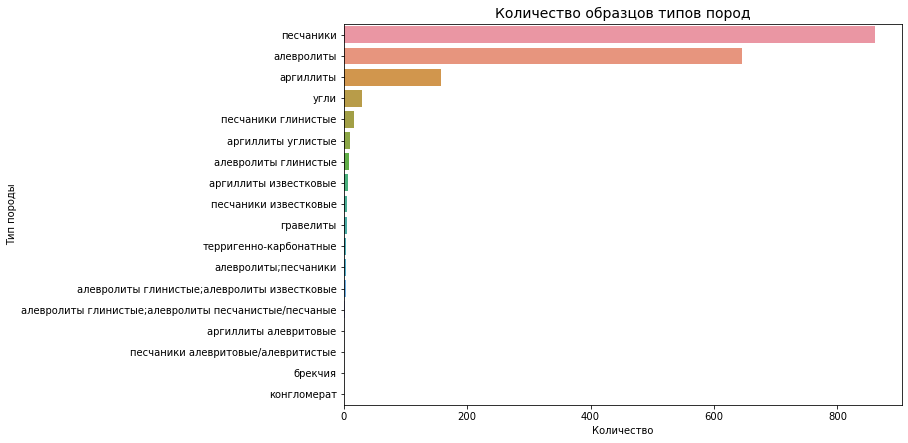

In [11]:
#построим график количества образцов типов пород
plt.figure(figsize=(10,7))
plt.style.context('seaborn-pastel')
sns.barplot(data=rock_sort, x="count", y="sort")
plt.title('Количество образцов типов пород', size=14)
plt.ylabel('Тип породы', size=10)
plt.xlabel('Количество', size=10)
plt.show()

Удалим из анализа гравелиты, терригенно-карбонатные породы, брекчию и конгломенрат - как значительно отличающиеся по литологии и мало представленные для анализа.

Также предлагаю очистить данные от карбонатных примесей - возможно, наличие карбонатов тоже как-то скажется на результатах анализа чисто терригенных пород.

In [12]:
list(rock_sort.sort)

['песчаники',
 'алевролиты',
 'аргиллиты',
 'угли',
 'песчаники глинистые',
 'аргиллиты углистые',
 'алевролиты глинистые',
 'аргиллиты известковые',
 'песчаники известковые',
 'гравелиты',
 'терригенно-карбонатные',
 'алевролиты;песчаники',
 'алевролиты глинистые;алевролиты известковые',
 'алевролиты глинистые;алевролиты песчанистые/песчаные',
 'аргиллиты алевритовые',
 'песчаники алевритовые/алевритистые',
 'брекчия',
 'конгломерат']

In [13]:
#список типов для удаления
rock_del = ['аргиллиты известковые', 
            'песчаники известковые',
            'гравелиты',
            'терригенно-карбонатные',
            'алевролиты глинистые;алевролиты известковые',
            'алевролиты;песчаники',
            'брекчия',
            'конгломерат']

In [14]:
data['null'] = data['R_mean']+data['U_mean']+data['K_mean']+data['T_mean']+data['R_U_mean']+data['P_mean']

In [15]:
#очистим данные, удалив строки с нулевыми значениями
data = data.query('rock not in @rock_del & null != 0')
data.drop(['null'], axis = 1)
data.shape

(1716, 12)

Объединим оставшиеся типы пород в 4 типа: угли, песчаники, алевролиты, аргиллиты:

In [16]:
#проверим на наличие явных дуликатов
data.duplicated().sum()

0

In [17]:
#группа песчаников
sands = ['песчаники', 'песчаники глинистые','песчаники алевритовые/алевритистые']

#группа алевролитов
al = ['алевролиты', 'алевролиты глинистые', 'алевролиты глинистые;алевролиты песчанистые/песчаные', '']

#группа аргиллитов
arg = ['аргиллиты','аргиллиты углистые', 'аргиллиты алевритовые']

#группа углей
coals = ['угли']

In [18]:
#зададим функцию для переименования типов породы
def rock_type(income):
    try:
        if income in sands:
            return 'песчаники'
        elif income in al:
            return 'алевролиты'
        elif income in arg:
            return 'аргиллиты'
        elif income in coals:
            return 'угли'
    except:
        pass

In [19]:
data['rock_type'] = data['rock'].apply(rock_type)
data.rock_type.value_counts()

песчаники     868
алевролиты    651
аргиллиты     165
угли           29
Name: rock_type, dtype: int64

**2.3. Работа с аномалиями**

Посмотрим на распределение величин, есть ли среди них выбросы и аномалии:

In [20]:
data.head(3)

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1,100.821250,0.142500,0.012600,6.349000,68.528250,0.0,2.338600,терригенные,NaN,алевролиты глинистые,str_3,178.192200,алевролиты
2,108.120000,0.155000,0.011850,7.020000,72.592000,0.0,2.272250,терригенные,NaN,алевролиты глинистые,str_4,190.171100,алевролиты
3,127.618649,0.172703,0.014324,7.751351,87.885676,0.0,2.295919,терригенные,NaN,аргиллиты,str_5,225.738622,аргиллиты


In [21]:
#список числовых переменных
means = ['R_mean', 'U_mean', 'K_mean', 'T_mean', 'R_U_mean', 'PR_mean', 'P_mean']

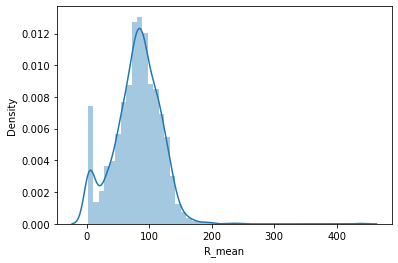

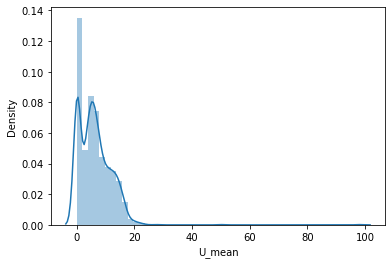

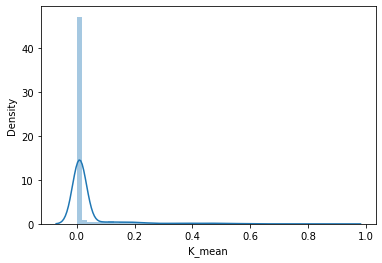

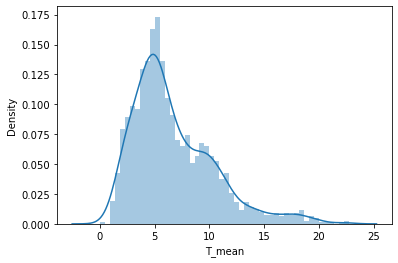

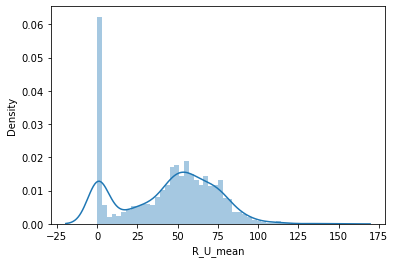

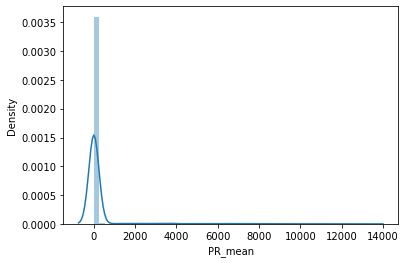

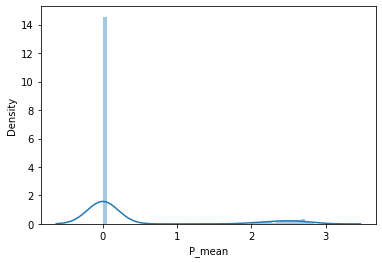

In [22]:
#распределение величин
for feature in means:
    sns.distplot(data[feature], bins=50)
    plt.show(); 

Очевидны выбросы по U,R,R_U в районе нуля. Посмотрим поближе на эти данные и подумаем, что с ними можно сделать.

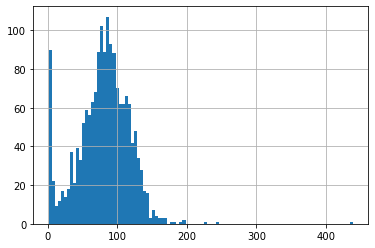

In [23]:
data['R_mean'].hist(bins = 100);

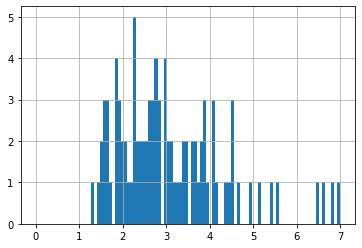

In [24]:
#найдём границу пика в районе 0
data['R_mean'].hist(bins = 100, range = (0,7));

Т.о. можно отсечь величины < 5.

In [25]:
#почистим данные
data = data.query('R_mean >=5')
data.shape

(1629, 13)

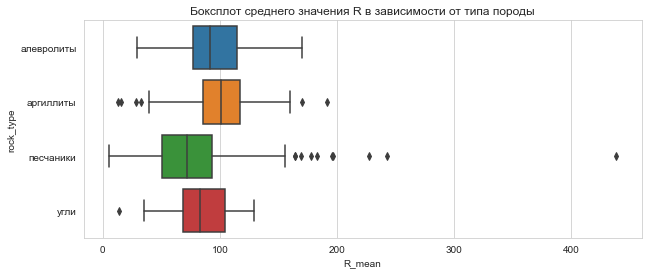

In [26]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'R_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения R в зависимости от типа породы');

Уже из распределения видно, что в районе R_mean = 100 встречаются все типы пород, поэтому прямая корреляция невозможна.

In [27]:
#посмотрим, что за данные по аргиллитам < 35 
data.query('rock_type == "аргиллиты" & R_mean <35')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
529,28.558000,3.804000,0.005400,3.766000,20.082000,0.0,0.0,терригенные,NaN,аргиллиты,str_531,56.215400,аргиллиты
530,13.213684,3.499474,0.003895,2.900000,9.738947,0.0,0.0,терригенные,NaN,аргиллиты углистые,str_532,29.356000,аргиллиты
554,15.126667,3.238889,0.004333,2.681111,9.476667,0.0,0.0,терригенные,NaN,аргиллиты углистые,str_556,30.527667,аргиллиты
1002,32.440000,5.194000,0.004400,3.164000,20.422000,0.0,0.0,терригенные,NaN,аргиллиты,str_1004,61.224400,аргиллиты


In [28]:
#сохраним индексы этих выбросов в отдельный список:
arg_R = data.query('rock_type == "аргиллиты" & R_mean <35').index

In [29]:
#посмотрим, что за данные по песчаникам > 160
data.query('rock_type == "песчаники" & R_mean >160')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1315,195.380000,11.000000,0.014500,18.290000,150.125000,0.000000,0.0,терригенные,NaN,песчаники,str_1317,374.809500,песчаники
1316,183.320000,13.030000,0.012000,17.900000,130.370000,0.000000,0.0,терригенные,NaN,песчаники,str_1318,344.632000,песчаники
1317,163.860000,11.970000,0.010000,17.170000,115.270000,0.000000,0.0,терригенные,NaN,песчаники,str_1319,308.280000,песчаники
1319,169.430000,14.650000,0.007000,19.260000,112.380000,0.010000,0.0,терригенные,NaN,песчаники,str_1321,315.727000,песчаники
1320,164.500000,15.640000,0.005000,20.070000,103.460000,0.080000,0.0,терригенные,NaN,песчаники,str_1322,303.675000,песчаники
1322,177.685000,9.970000,0.006500,21.345000,136.855000,0.103333,0.0,терригенные,NaN,песчаники,str_1324,345.861500,песчаники
1487,196.230000,23.273333,0.010667,5.320000,100.516667,0.040000,0.0,терригенные,NaN,песчаники,str_1489,325.350667,песчаники
1495,227.102500,27.495000,0.011250,5.825000,114.087500,0.033333,0.0,терригенные,с запахом УВ,песчаники,str_1497,374.521250,песчаники
1544,242.721111,50.356667,0.005667,8.816667,66.843333,0.028571,0.0,терригенные,нефтенасыщенные,песчаники,str_1546,368.743444,песчаники
1546,438.620000,97.930000,0.005000,10.420000,75.120000,0.000000,0.0,терригенные,нефтенасыщенные,песчаники,str_1548,622.095000,песчаники


In [30]:
#сохраним индексы этих выбросов в отдельный список:
sand_R = data.query('rock_type == "песчаники" & R_mean >160').index

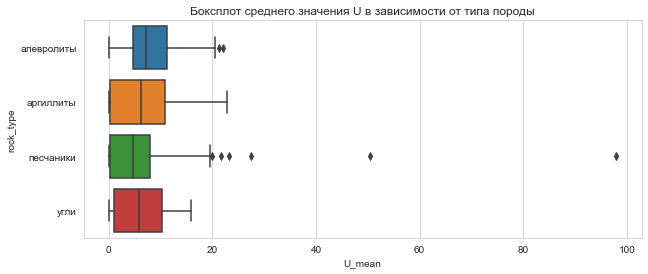

In [31]:
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'U_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения U в зависимости от типа породы');

In [32]:
#посмотрим на строки с выбросами
data.query('rock_type == "песчаники" & U_mean >22')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1487,196.230000,23.273333,0.010667,5.320000,100.516667,0.040000,0.0,терригенные,NaN,песчаники,str_1489,325.350667,песчаники
1495,227.102500,27.495000,0.011250,5.825000,114.087500,0.033333,0.0,терригенные,с запахом УВ,песчаники,str_1497,374.521250,песчаники
1544,242.721111,50.356667,0.005667,8.816667,66.843333,0.028571,0.0,терригенные,нефтенасыщенные,песчаники,str_1546,368.743444,песчаники
1546,438.620000,97.930000,0.005000,10.420000,75.120000,0.000000,0.0,терригенные,нефтенасыщенные,песчаники,str_1548,622.095000,песчаники


In [33]:
#сохраним индексы этих выбросов в отдельный список:
sand_U = data.query('rock_type == "песчаники" & U_mean >22').index

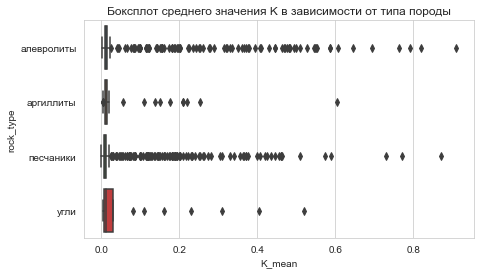

In [34]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'K_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения K в зависимости от типа породы');

Количество выбросов слишком велико, а основная масса значений пересекается по всем классам пород.

Предлагаю вообще убрать параметр K_mean из анализа.

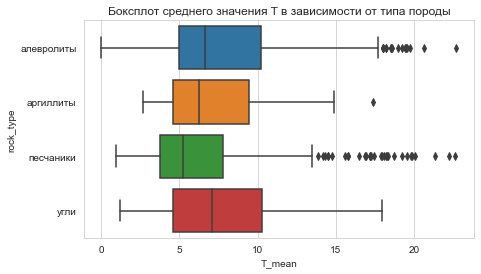

In [35]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'T_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения T в зависимости от типа породы');

Тоже много, очень много выбросов. Про этом основная масса значений пересекается. Попробуем, конечно, но выглядит очень сомнительно.

In [36]:
#посмотрим на строки с выбросами
data.query('rock_type == "алевролиты" & T_mean >17')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
2375,118.800000,2.150000,0.180000,19.750000,0.0,0.065000,2.635000,терригенные,NaN,алевролиты,str_2377,143.515000,алевролиты
2381,115.521667,8.628333,0.185000,18.531667,0.0,0.187143,2.642000,терригенные,NaN,алевролиты,str_2383,145.508667,алевролиты
2382,116.232500,6.230000,0.190000,22.722500,0.0,0.080000,2.714250,терригенные,NaN,алевролиты,str_2384,148.089250,алевролиты
2402,121.296667,5.540000,0.820000,17.353333,0.0,0.000000,2.729000,терригенные,NaN,алевролиты,str_2404,147.739000,алевролиты
2403,114.067500,6.890000,0.790000,18.037500,0.0,0.000000,2.647500,терригенные,NaN,алевролиты,str_2405,142.432500,алевролиты
2416,114.536250,7.925000,0.233750,19.557500,0.0,0.000000,2.693875,терригенные,NaN,алевролиты,str_2418,144.946375,алевролиты
2421,103.505000,3.830000,0.910000,18.025000,0.0,0.000000,2.652500,терригенные,NaN,алевролиты,str_2423,128.922500,алевролиты
2426,104.340000,6.002000,0.150000,19.236000,0.0,0.000000,2.682400,терригенные,NaN,алевролиты,str_2428,132.410400,алевролиты
2434,104.289091,6.765455,0.407273,17.687273,0.0,0.000000,2.782091,терригенные,NaN,алевролиты,str_2436,131.931182,алевролиты
2437,103.813333,4.673333,0.066667,19.528333,0.0,0.000000,2.695667,терригенные,NaN,алевролиты,str_2439,130.777333,алевролиты


In [37]:
#сохраним индексы этих выбросов в отдельный список:
al_T = data.query('rock_type == "алевролиты" & T_mean >17').index

In [38]:
#посмотрим на строки с выбросами
data.query('rock_type == "песчаники" & T_mean >13')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1312,143.020000,8.840000,0.010000,14.320000,107.670000,0.000000,0.000000,терригенные,NaN,песчаники,str_1314,273.860000,песчаники
1315,195.380000,11.000000,0.014500,18.290000,150.125000,0.000000,0.000000,терригенные,NaN,песчаники,str_1317,374.809500,песчаники
1316,183.320000,13.030000,0.012000,17.900000,130.370000,0.000000,0.000000,терригенные,NaN,песчаники,str_1318,344.632000,песчаники
1317,163.860000,11.970000,0.010000,17.170000,115.270000,0.000000,0.000000,терригенные,NaN,песчаники,str_1319,308.280000,песчаники
1318,153.240000,14.980000,0.007000,15.760000,95.480000,0.000000,0.000000,терригенные,NaN,песчаники,str_1320,279.467000,песчаники
1319,169.430000,14.650000,0.007000,19.260000,112.380000,0.010000,0.000000,терригенные,NaN,песчаники,str_1321,315.727000,песчаники
1320,164.500000,15.640000,0.005000,20.070000,103.460000,0.080000,0.000000,терригенные,NaN,песчаники,str_1322,303.675000,песчаники
1321,140.276667,12.500000,0.005000,18.190000,90.463333,0.061429,0.000000,терригенные,NaN,песчаники,str_1323,261.435000,песчаники
1322,177.685000,9.970000,0.006500,21.345000,136.855000,0.103333,0.000000,терригенные,NaN,песчаники,str_1324,345.861500,песчаники
1323,145.035000,6.445000,0.007000,17.960000,118.690000,0.095000,0.000000,терригенные,NaN,песчаники,str_1325,288.137000,песчаники


In [39]:
#сохраним индексы этих выбросов в отдельный список:
sand_T = data.query('rock_type == "песчаники" & T_mean >13').index

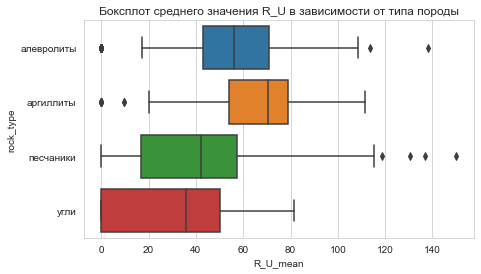

In [40]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'R_U_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения R_U в зависимости от типа породы');

In [41]:
#посмотрим на строки с выбросами
data.query('rock_type == "алевролиты" & R_U_mean <15')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
2365,66.160000,3.820000,0.097500,8.380000,0.0,0.000,2.574750,терригенные,NaN,алевролиты,str_2367,81.032250,алевролиты
2368,100.200000,3.400000,0.180000,16.020000,0.0,0.515,2.020000,терригенные,NaN,алевролиты,str_2370,121.820000,алевролиты
2370,89.140000,5.720000,0.260000,8.700000,0.0,0.060,2.261000,терригенные,NaN,алевролиты,str_2372,106.081000,алевролиты
2372,94.450000,7.580000,0.100000,9.990000,0.0,0.060,2.569000,терригенные,NaN,алевролиты,str_2374,114.689000,алевролиты
2375,118.800000,2.150000,0.180000,19.750000,0.0,0.065,2.635000,терригенные,NaN,алевролиты,str_2377,143.515000,алевролиты
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,87.025000,4.715000,0.040000,13.355000,0.0,0.000,2.746000,терригенные,NaN,алевролиты,str_2557,107.881000,алевролиты
2556,83.230000,4.873333,0.043333,16.093333,0.0,0.000,2.660000,терригенные,NaN,алевролиты,str_2558,106.900000,алевролиты
2558,98.274545,6.587273,0.225455,16.928182,0.0,0.000,2.611182,терригенные,NaN,алевролиты,str_2560,124.626636,алевролиты
2560,107.890000,6.730000,0.123333,14.580000,0.0,0.000,2.668667,терригенные,NaN,алевролиты,str_2562,131.992000,алевролиты


In [42]:
#сохраним индексы этих выбросов в отдельный список:
al_RU_min = data.query('rock_type == "алевролиты" & R_U_mean <15').index

In [43]:
#посмотрим на строки с выбросами
data.query('rock_type == "алевролиты" & R_U_mean >110')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1313,151.37,9.25,0.009,15.29,113.40,0.0,0.0,терригенные,NaN,алевролиты,str_1315,289.319,алевролиты
1314,170.17,7.74,0.012,16.77,138.32,0.0,0.0,терригенные,NaN,алевролиты,str_1316,333.012,алевролиты


In [44]:
#сохраним индексы этих выбросов в отдельный список:
al_RU_max = data.query('rock_type == "алевролиты" & R_U_mean >110').index

In [45]:
#посмотрим на строки с выбросами
data.query('rock_type == "аргиллиты" & R_U_mean <20')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
530,13.213684,3.499474,0.003895,2.900000,9.738947,0.0,0.000000,терригенные,NaN,аргиллиты углистые,str_532,29.356000,аргиллиты
554,15.126667,3.238889,0.004333,2.681111,9.476667,0.0,0.000000,терригенные,NaN,аргиллиты углистые,str_556,30.527667,аргиллиты
2366,78.555000,7.427500,0.252500,13.072500,0.000000,0.0,2.412750,терригенные,NaN,аргиллиты,str_2368,101.720250,аргиллиты
2399,92.356364,5.059091,0.150000,11.447273,0.000000,0.0,2.132909,терригенные,NaN,аргиллиты,str_2401,111.145636,аргиллиты
2469,59.290000,1.784000,0.056000,6.510000,0.000000,0.0,2.532400,терригенные,NaN,аргиллиты,str_2471,70.172400,аргиллиты
2471,75.734286,3.755714,0.110000,6.411429,0.000000,0.0,1.762857,терригенные,NaN,аргиллиты,str_2473,87.774286,аргиллиты
2476,116.936667,8.860000,0.136667,14.900000,0.000000,0.0,2.643333,терригенные,NaN,аргиллиты,str_2478,143.476667,аргиллиты
2483,90.680000,5.690000,0.175000,11.390000,0.000000,0.0,2.590000,терригенные,NaN,аргиллиты,str_2485,110.525000,аргиллиты
2486,111.748333,4.601667,0.603333,12.398333,0.000000,0.0,2.440333,терригенные,NaN,аргиллиты,str_2488,131.792000,аргиллиты
2487,83.760000,3.590000,0.210000,14.070000,0.000000,0.0,2.172000,терригенные,NaN,аргиллиты,str_2489,103.802000,аргиллиты


In [46]:
#сохраним индексы этих выбросов в отдельный список:
arg_RU = data.query('rock_type == "аргиллиты" & R_U_mean <20').index

In [47]:
#посмотрим на строки с выбросами
data.query('rock_type == "песчаники" & R_U_mean >118')

,R_mean,U_mean,K_mean,T_mean,R_U_mean,PR_mean,P_mean,type,sat,rock,str,null,rock_type
1315,195.380,11.000,0.0145,18.290,150.125,0.000000,0.0,терригенные,NaN,песчаники,str_1317,374.8095,песчаники
1316,183.320,13.030,0.0120,17.900,130.370,0.000000,0.0,терригенные,NaN,песчаники,str_1318,344.6320,песчаники
1322,177.685,9.970,0.0065,21.345,136.855,0.103333,0.0,терригенные,NaN,песчаники,str_1324,345.8615,песчаники
1323,145.035,6.445,0.0070,17.960,118.690,0.095000,0.0,терригенные,NaN,песчаники,str_1325,288.1370,песчаники


In [48]:
#сохраним индексы этих выбросов в отдельный список:
sands_RU = data.query('rock_type == "песчаники" & R_U_mean >118').index

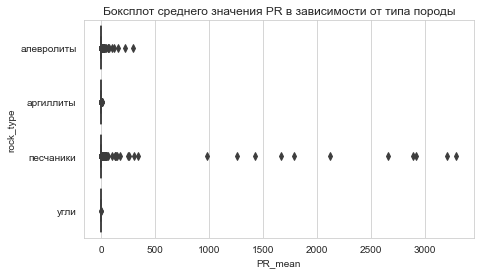

In [49]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'PR_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения PR в зависимости от типа породы');
#plt.xlim(0,20)

Убираем из анализа PR_mean по той же причине, что и T_mean

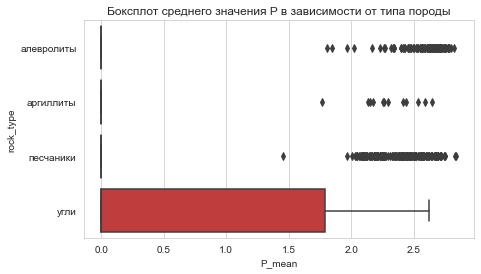

In [50]:
plt.figure(figsize=(7,4))
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'P_mean', y = 'rock_type', data = data)
plt.title('Боксплот среднего значения P в зависимости от типа породы');

Параметр позволяет лишь диагностировать угли, поэтому убираем его из анализа.

In [51]:
#ещё раз посмотрим на размер датафрейма
data.shape

(1629, 13)

In [52]:
#создадим общий список индексов строк, данные которых попали в выбросы
ind = list(arg_R) + list(sand_R) + list(sand_U) + list(al_T) + list(sand_T) + list(al_RU_min) + list(al_RU_max) + list(arg_RU) + list(sands_RU)
len(ind)

188

In [53]:
#отбросим выбросы
data = data.query('index not in @ind')
data.shape

(1477, 13)

In [54]:
#удалим ненужные для анализа столбцы, оставив очищенные и самые информативные
data = data.drop(['K_mean', 'PR_mean', 'P_mean', 'type', 'sat', 'rock', 'str', 'null'], axis = 1)
data.shape

(1477, 5)

In [55]:
reduce = data.shape[0] / (data.shape[0] + 2566)
print('Количество столбцов уменьшилось на {:.1%}'.format(reduce))

Количество столбцов уменьшилось на 36.5%


Итого у нас имеется таблица из 1477 строк и 5 столбцов, количество данных уменьшилось почти на треть.

Попробуем что-нибудь из этого выжать.

**Вывод**:

**📌 Если очищать данные от всех выборосов по всем измеренным величинам, то их количество сократится более чем на треть.** 

**📌 При этом они будет идеально вычищены и, надо полагать, несколько далеки от реальности.**

**📌 Видимо, основная проблема - в классификации горных пород и учёте влияния включений на показания измерений.**

**📌 Требуется глубокое понимание физического вклада примесей на показания счётчиков, а затем пересмотр классификации (кластеризации).** 

**📌 Считаю целесообразным изначально дробить на бОльшее количество классов, для лучшей дифференциации.**

## Шаг 3. Исследовательский анализ данных (EDA)

**3.1. Анализ взаимной корреляции**

Посмотрим, есть ли явные корреляционные пары фичей (признаков):

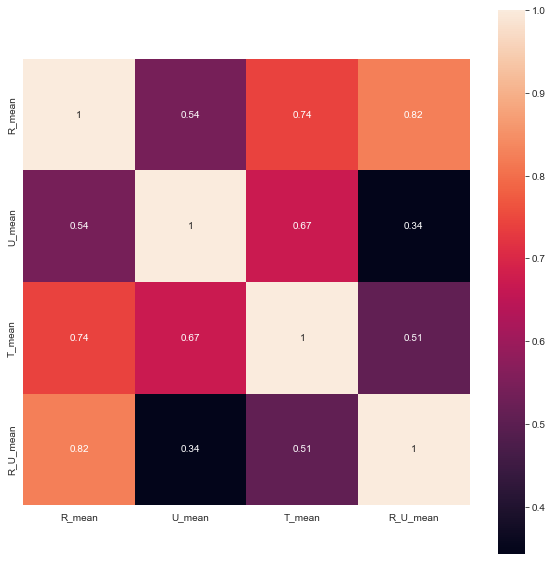

In [182]:
#строим корреляционную матрицу
corr_m = data.corr() 

#нарисуем heatmap
plt.figure(figsize = (10,10))
sns.heatmap(corr_m, square = True, annot = True)
plt.show()

Очевидно, что нет. Это говорит о том, что выбранные параметры (фичи) не зависят друг от друга.

In [57]:
data.head()

,R_mean,U_mean,T_mean,R_U_mean,rock_type
1,100.821250,0.142500,6.349000,68.528250,алевролиты
2,108.120000,0.155000,7.020000,72.592000,алевролиты
3,127.618649,0.172703,7.751351,87.885676,аргиллиты
4,80.832500,0.127500,6.272500,52.157500,песчаники
5,90.550000,0.153333,6.433333,58.323333,песчаники


**3.2. Кластеризация методом K-means**

Представим себе, что мы не знаем изначального разделения на типы пород. Посмотрим, сможет ли машина разделить все образцы на 4 класса, а затем сравним с реальн разделением пород:

(1477, 4)
                R_mean     U_mean    T_mean   R_U_mean
cluster_km                                            
0           119.582790  13.091038  9.722250  73.006126
1            87.267264   0.184035  4.884155  61.471421
2            75.581227   7.188411  6.243501  44.759105
3            40.576206   3.427523  3.577487  17.559029


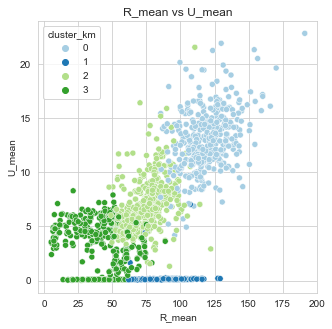

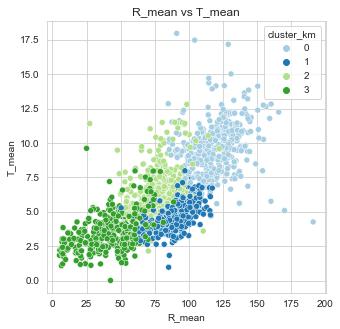

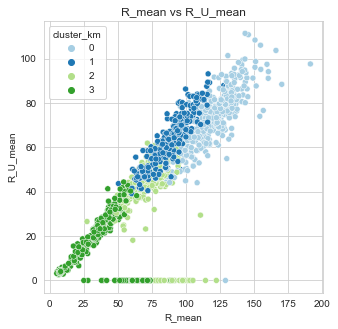

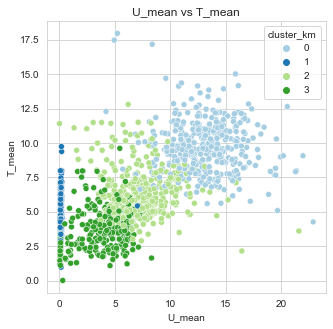

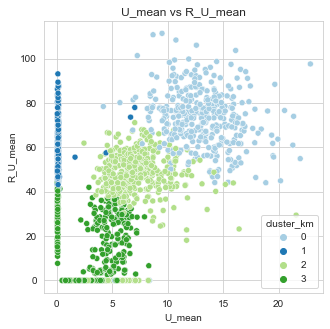

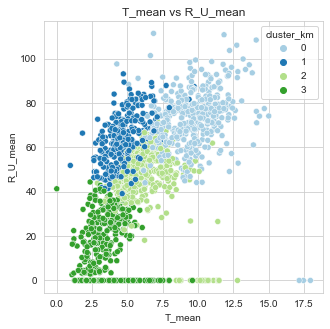

In [183]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(x=df[x_name], y=df[y_name],
           hue=df[cluster_name], palette='Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# читаем данные
da = data.drop(['rock_type'], axis = 1)
print(da.shape)
 
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(da)
 
# задаём модель k_means с числом кластеров 3 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(x_sc)
 
# сохраняем метки кластера в поле датасета
da['cluster_km'] = labels
 
# выводим статистику по средним значениям признаков по кластеру
clusters = da.groupby(['cluster_km']).mean()
print(clusters)
 
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(da.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(da, pair[0], pair[1], 'cluster_km')

Получилась какая-то кластеризация, но как она увязана с изначальными 4-мя классами - не понятно :)


In [59]:
#присоединим известные данные
da_both = da.join(data['rock_type'])
da_both 

,R_mean,U_mean,T_mean,R_U_mean,cluster_km,rock_type
1,100.821250,0.142500,6.349000,68.528250,1,алевролиты
2,108.120000,0.155000,7.020000,72.592000,1,алевролиты
3,127.618649,0.172703,7.751351,87.885676,1,аргиллиты
4,80.832500,0.127500,6.272500,52.157500,1,песчаники
5,90.550000,0.153333,6.433333,58.323333,1,песчаники
...,...,...,...,...,...,...
2548,68.220000,2.000000,7.520000,0.000000,3,угли
2557,25.000000,5.440000,9.610000,0.000000,3,песчаники
2563,47.633333,0.805556,2.118889,0.000000,3,песчаники
2564,51.380000,4.080000,6.580000,0.000000,3,песчаники


**3.3. Сравнение предсказания с реальными данными**

Построим гистограммы распредления полученных кластеров в соответствии с имеющимися типами пород:

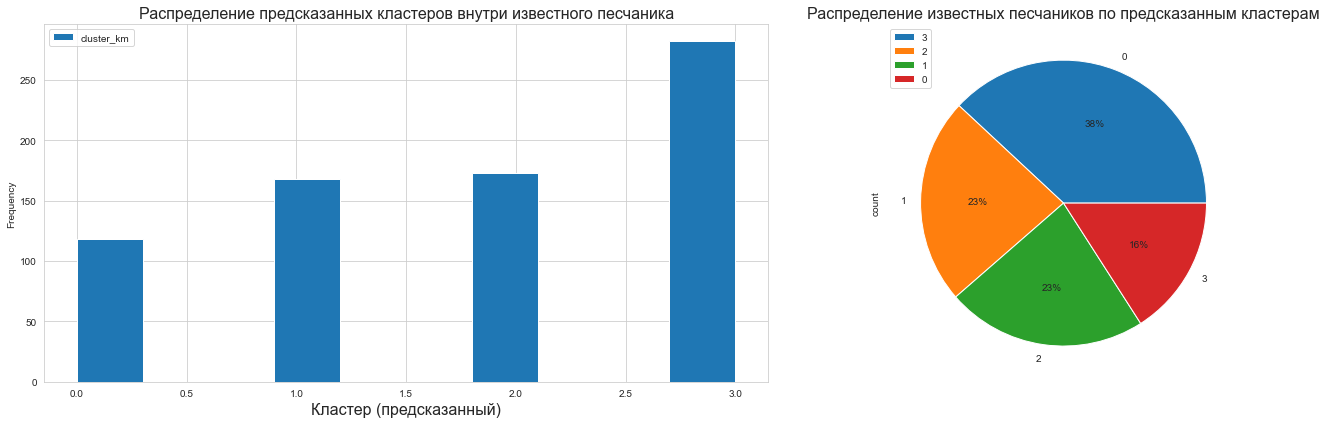

In [60]:
#для песчаников
sands_clust = da_both.query('rock_type == "песчаники"')['cluster_km']
sands_round = sands_clust.value_counts().reset_index().rename(columns = {'index':'cluster', 'cluster_km':'count'})

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
sands_clust.plot(kind = 'hist', grid=True, ax=ax1)
plt.legend()
plt.xlabel('Кластер (предсказанный)', size = 16)
plt.title('Распределение предсказанных кластеров внутри известного песчаника', size = 16)

ax2 = plt.subplot(1, 2, 2)
sands_round['count'].plot(kind = 'pie', legend = True, autopct='%1.0f%%', ax=ax2)
plt.legend(sands_round['cluster'])
plt.title('Распределение известных песчаников по предсказанным кластерам', size = 16);

plt.tight_layout()
plt.show() 

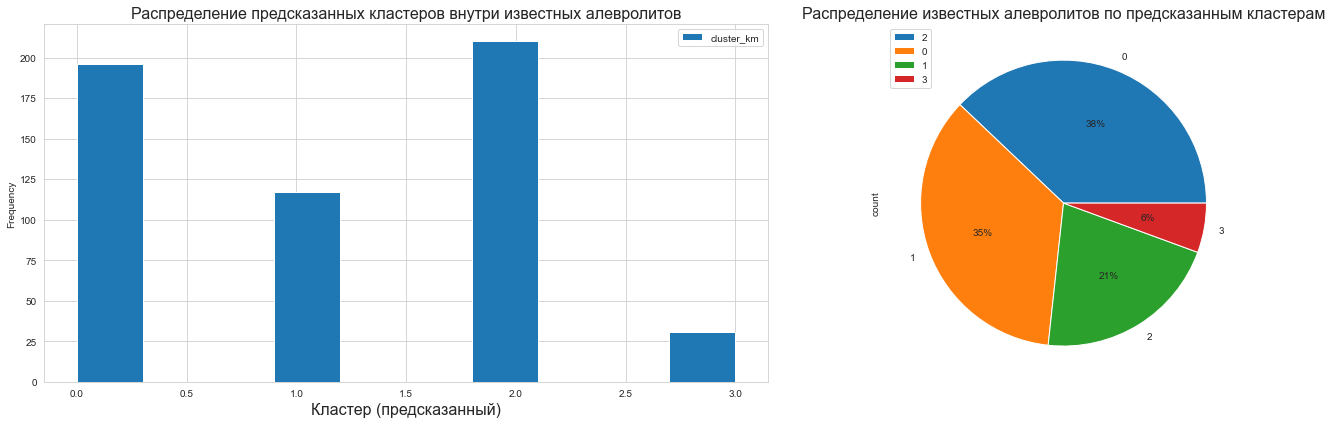

In [61]:
#для алевролитов
al_clust = da_both.query('rock_type == "алевролиты"')['cluster_km']
al_round = al_clust.value_counts().reset_index().rename(columns = {'index':'cluster', 'cluster_km':'count'})

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
al_clust.plot(kind = 'hist', grid=True, ax=ax1)
plt.legend()
plt.xlabel('Кластер (предсказанный)', size = 16)
plt.title('Распределение предсказанных кластеров внутри известных алевролитов', size = 16)

ax2 = plt.subplot(1, 2, 2)
al_round['count'].plot(kind = 'pie', legend = True, autopct='%1.0f%%', ax=ax2)
plt.legend(al_round['cluster'])
plt.title('Распределение известных алевролитов по предсказанным кластерам', size = 16);

plt.tight_layout()
plt.show() 

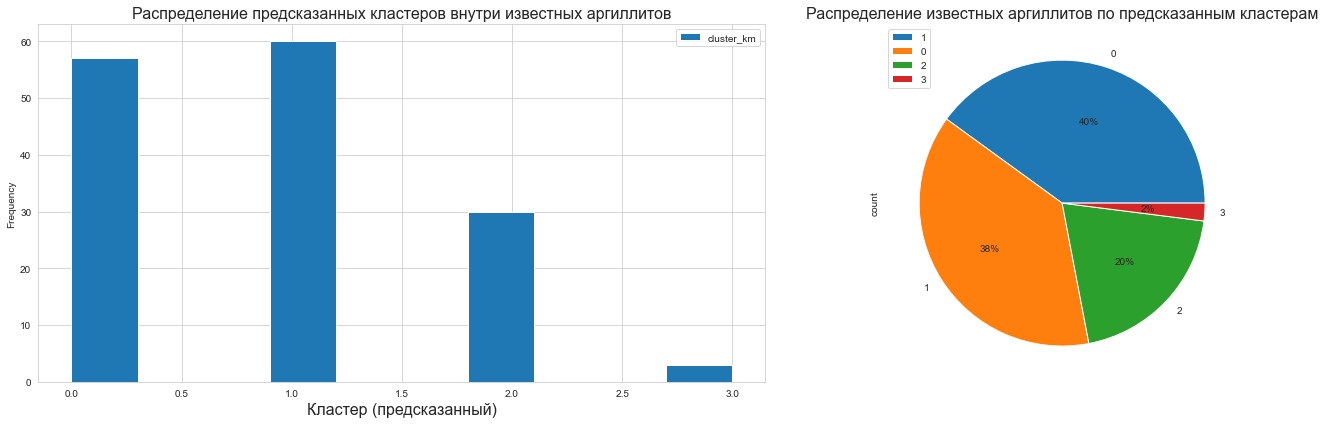

In [62]:
#для аргиллитов
arg_clust = da_both.query('rock_type == "аргиллиты"')['cluster_km']
arg_round = arg_clust.value_counts().reset_index().rename(columns = {'index':'cluster', 'cluster_km':'count'})

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
arg_clust.plot(kind = 'hist', grid=True, ax=ax1)
plt.legend()
plt.xlabel('Кластер (предсказанный)', size = 16)
plt.title('Распределение предсказанных кластеров внутри известных аргиллитов', size = 16)

ax2 = plt.subplot(1, 2, 2)
arg_round['count'].plot(kind = 'pie', legend = True, autopct='%1.0f%%', ax=ax2)
plt.legend(arg_round['cluster'])
plt.title('Распределение известных аргиллитов по предсказанным кластерам', size = 16);

plt.tight_layout()
plt.show() 

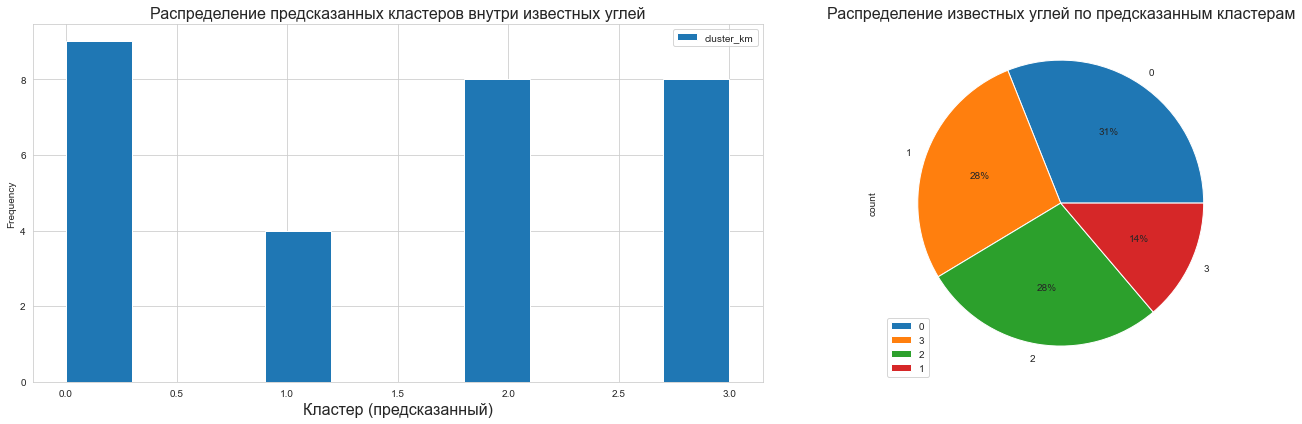

In [63]:
#для углей
coal_clust = da_both.query('rock_type == "угли"')['cluster_km']
coal_round = coal_clust.value_counts().reset_index().rename(columns = {'index':'cluster', 'cluster_km':'count'})

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 2, 1)
coal_clust.plot(kind = 'hist', grid=True, ax=ax1)
plt.legend()
plt.xlabel('Кластер (предсказанный)', size = 16)
plt.title('Распределение предсказанных кластеров внутри известных углей', size = 16)

ax2 = plt.subplot(1, 2, 2)
coal_round['count'].plot(kind = 'pie', legend = True, autopct='%1.0f%%', ax=ax2)
plt.legend(coal_round['cluster'])
plt.title('Распределение известных углей по предсказанным кластерам', size = 16);

plt.tight_layout()
plt.show() 

Как видно, получается что-то не очень коррелируемое 🙄.

Я вижу другой способ работы - выполнить мультиклассификацию (с учителем), поскольку имеем дело с дискретным и конечным количеством классов. 

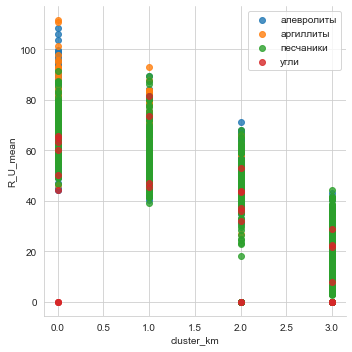

In [64]:
# Provide a dictionary to the palette argument
sns.lmplot(x="cluster_km", y="R_U_mean", data=da_both, fit_reg=False, hue='rock_type', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
 
plt.show()

На графике наглядно видно, как перемешаны прогнозные и реальные классы. Так что есть что ещё изучать и исследовать 👍

**3.4. Другие алгоритмы машинного обучения**

Поскольку я пока не изучала мультиклассификацию и не умею делать прогноз 4-х классов, то я решила попробовать сперва разделить типы пород на угли/не угли, песчаник/не песчаник и т.д. И затем построить 4 независимых модели, каждая из которых будет учиться вычленять заданный тип пород.

In [72]:
#сохраним данные в новую переменную:
df = data

#поменяем названия классов на числа
df = pd.get_dummies(df).rename(columns = {'rock_type_алевролиты':'al', 'rock_type_аргиллиты':'arg',\
                                          'rock_type_песчаники':'sands', 'rock_type_угли':'coals'})
display(df.head())
df.shape

,R_mean,U_mean,T_mean,R_U_mean,al,arg,sands,coals
1,100.821250,0.142500,6.349000,68.528250,1,0,0,0
2,108.120000,0.155000,7.020000,72.592000,1,0,0,0
3,127.618649,0.172703,7.751351,87.885676,0,1,0,0
4,80.832500,0.127500,6.272500,52.157500,0,0,1,0
5,90.550000,0.153333,6.433333,58.323333,0,0,1,0


(1477, 8)

,rock_type,count,ratio
0,песчаники,741,0.50
1,алевролиты,554,0.38
2,аргиллиты,150,0.10
3,угли,29,0.02


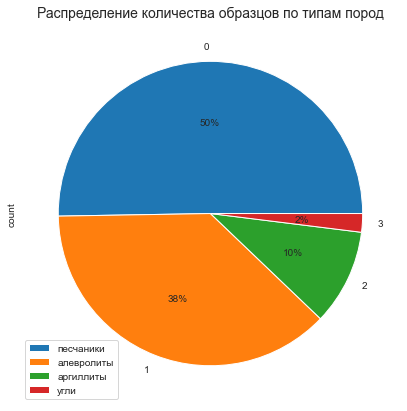

In [98]:
#подготовим таблицу и график соотношения количества образцов по всем классам
types = data.pivot_table(index = 'rock_type', values = 'R_mean', aggfunc = 'count')\
        .rename(columns = {'R_mean':'count'}).sort_values('count', ascending = False).reset_index()
types['ratio'] = round(types['count'] / types['count'].sum(), 2)
display(types)

plt.figure(figsize=(10,7))
types['count'].plot(kind = 'pie', legend = True, autopct='%1.0f%%')
plt.legend(types['rock_type'], loc='lower left')
plt.title('Распределение количества образцов по типам пород', size = 14);

**3.4.1. Угли**

In [74]:
#сохраним в переменную только искомый тип породы
df_coals = df.drop(['al','arg','sands'], axis = 1)
df_coals.shape

(1477, 5)

In [77]:
#поскольку обучающая выборка содержит данные различных порядков (0,14 - 108), 
#то предварительно выполним масштабирование признаков:

#разделяем данные на признаки (матрица X) и целевую переменную (y)
X = df_coals.drop('coals', axis = 1)
y = df_coals['coals']

#выведем название признаков в датасете
print(X.columns) 

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#выведем среднее и стандартное отклонение признака 'R_mean'
print('Mean for train', np.mean(X_train['R_mean']))
print('Std for train', np.std(X_train['R_mean']))

#стандартизируем данные 
scaler = StandardScaler() # создаём объект класса scaler
scaler.fit(X_train) # обучим scaler на обучающей выборке методом fit
X_train_st =scaler.transform(X_train) # стандартизируем обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test) # стандартизируйтеем тестовую выборку методом transform scaler

print('Mean for standartized train', np.mean(X_train_st[:,0]))
print('Std for standartized train', np.std(X_train_st[:,0]))
print('Mean for standartized test', np.mean(X_test_st[:,0]))
print('Std for standartized test', np.std(X_test_st[:,0]))

Index(['R_mean', 'U_mean', 'T_mean', 'R_U_mean'], dtype='object')
Mean for train 81.89609343767881
Std for train 30.830733619955883
Mean for standartized train -3.4444175802087836e-16
Std for standartized train 1.0
Mean for standartized test 0.01684310574626275
Std for standartized test 1.0685864061684758


**Вывод:**

    до стандартизации порядок среднего значения признака R_mean на обучающей выборке был около 80, после стандартизации - около 3. Стандартное отклонение до стандартизации 30, после - 1. При этом на тестовой выборке после стандартизации среднее значение практически равно 0, а стандартное отклонение  почти 1. Это отличный результат.

Теперь дело за малым - обучить модель 4-мя разными способами 😀 и сравнить метрики 📈:

In [110]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


print('Размер датасета:', df_coals.shape)
df_coals.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_coals['coals'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_coals.drop('coals', axis=1)
y = df_coals['coals']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:',
)


#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга:'
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии:
	Accuracy: 0.99
	Precision: 0.00
	Recall: 0.00
	F1: 0.00
	ROC_AUC: 0.68
Метрики для модели дерева решений:
	Accuracy: 0.97
	Precision: 0.17
	Recall: 0.25
	F1: 0.20
	ROC_AUC: 0.62
Метрики для модели случайного леса:
	Accuracy: 0.99
	Precision: 1.00
	Recall: 0.25
	F1: 0.40
	ROC_AUC: 0.76
Метрики для модели градиентного бустинга:
	Accuracy: 0.99
	Precision: 1.00
	Recall: 0.25
	F1: 0.40
	ROC_AUC: 0.66


**📌 Вывод по наблюдениям:**

    Максимальная точность предсказания углей (ROC_AUC) - 0,76 при модели случайного леса.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - везде высокая
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - максимален у деревьев обоих видов.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,25 у всех, кроме логистической регрессии.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,4 у деревьев. 

In [172]:
#выпишем максимальные значения в список
coal = ['угли', 0.76, 0.99, 1, 0.25, 0.4]

In [108]:
print('Дисбаланс классов составляет:', round(types.loc[3, 'ratio']*100,0), ':', 100 - round(types.loc[3, 'ratio']*100,0))
print('Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:')

Дисбаланс классов составляет: 2.0 : 98.0
Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:


In [117]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации с учётом порога'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#зададим порог
threshold = 0.25

print('Размер датасета:', df_coals.shape)
df_coals.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_coals['coals'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_coals.drop('coals', axis=1)
y = df_coals['coals']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    lr_custom_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии с кастомным порогом:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
tree_custom_predictions = [0 if i < threshold else 1 for i in tree_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    tree_custom_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений с кастомным порогом:',
)

#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_custom_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса с кастомным порогом:',
)

#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
gb_custom_predictions = [0 if i < threshold else 1 for i in gb_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_custom_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга с кастомным порогом:',
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии с кастомным порогом:
	Accuracy: 0.99
	Precision: 1.00
	Recall: 0.25
	F1: 0.40
	ROC_AUC: 0.68
Метрики для модели дерева решений с кастомным порогом:
	Accuracy: 0.97
	Precision: 0.17
	Recall: 0.25
	F1: 0.20
	ROC_AUC: 0.62
Метрики для модели случайного леса с кастомным порогом:
	Accuracy: 0.98
	Precision: 0.33
	Recall: 0.25
	F1: 0.29
	ROC_AUC: 0.76
Метрики для модели градиентного бустинга с кастомным порогом:
	Accuracy: 0.98
	Precision: 0.25
	Recall: 0.25
	F1: 0.25
	ROC_AUC: 0.66


**📌 Вывод по наблюдениям после учёта дисбаланса классов:**

    Максимальная точность предсказания углей (ROC_AUC) - 0,76 при модели случайного леса.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - везде высокая
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 1 при логистической регрессии.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,25 у всех, кроме логистической регрессии.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,4 у логистической регрессии. 

In [173]:
#выпишем максимальные значения в список
coal_cust = ['угли с учётом дисбаланса', 0.76, 0.99, 1, 0.25, 0.4]

**3.4.2. Песчаники**

In [174]:
#сохраним в переменную только искомый тип породы
df_sands = df.drop(['al','arg','coals'], axis = 1)
df_sands.shape

(1477, 5)

In [123]:
#поскольку обучающая выборка содержит данные различных порядков (0,14 - 108), 
#то предварительно выполним масштабирование признаков:

#разделяем данные на признаки (матрица X) и целевую переменную (y)
X = df_sands.drop('sands', axis = 1)
y = df_sands['sands']

#выведем название признаков в датасете
print(X.columns) 

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#выведем среднее и стандартное отклонение признака 'R_mean'
print('Mean for train', np.mean(X_train['R_U_mean']))
print('Std for train', np.std(X_train['R_U_mean']))

#стандартизируем данные 
scaler = StandardScaler() # создаём объект класса scaler
scaler.fit(X_train) # обучим scaler на обучающей выборке методом fit
X_train_st =scaler.transform(X_train) # стандартизируем обучающую выборку методом transform scaler 
X_test_st = scaler.transform(X_test) # стандартизируйтеем тестовую выборку методом transform scaler

print('Mean for standartized train', np.mean(X_train_st[:,0]))
print('Std for standartized train', np.std(X_train_st[:,0]))
print('Mean for standartized test', np.mean(X_test_st[:,0]))
print('Std for standartized test', np.std(X_test_st[:,0]))

Index(['R_mean', 'U_mean', 'T_mean', 'R_U_mean'], dtype='object')
Mean for train 49.90699238890285
Std for train 24.343362931630253
Mean for standartized train -1.6620442908867713e-16
Std for standartized train 0.9999999999999999
Mean for standartized test -0.026623599780572542
Std for standartized test 1.0450916931114416


**Вывод:**

    до стандартизации порядок среднего значения признака R_U_mean на обучающей выборке был около 50, после стандартизации - около 2. Стандартное отклонение до стандартизации 24, после - 1. При этом на тестовой выборке после стандартизации среднее значение практически равно 0, а стандартное отклонение  почти 1. Это отличный результат. 

Обучим модель распознавать песчаники 4-мя разными способами и сравним метрики 📈:

In [134]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


print('Размер датасета:', df_sands.shape)
df_sands.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_sands['sands'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_sands.drop('sands', axis=1)
y = df_sands['sands']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:',
)


#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга:'
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии:
	Accuracy: 0.70
	Precision: 0.75
	Recall: 0.61
	F1: 0.67
	ROC_AUC: 0.75
Метрики для модели дерева решений:
	Accuracy: 0.69
	Precision: 0.71
	Recall: 0.67
	F1: 0.69
	ROC_AUC: 0.70
Метрики для модели случайного леса:
	Accuracy: 0.74
	Precision: 0.77
	Recall: 0.71
	F1: 0.74
	ROC_AUC: 0.81
Метрики для модели градиентного бустинга:
	Accuracy: 0.75
	Precision: 0.80
	Recall: 0.68
	F1: 0.73
	ROC_AUC: 0.82


**📌 Вывод по наблюдениям:**

    Максимальная точность предсказания песчаников (ROC_AUC) - 0,82 при модели градиентного бустинга.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - 0,75 при модели градиентного бустинга.
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 0,8 при модели градиентного бустинга.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,71 у модели случайного леса.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,74 у леса. 

In [126]:
#выпишем максимальные значения в список
sands = ['песчаники', 0.82, 0.75, 0.8, 0.71, 0.74]

In [128]:
print('Дисбаланса классов нет, доля песчаников составляет:', round(types.loc[0, 'ratio']*100,0), ':', 100 - round(types.loc[0, 'ratio']*100,0))

Дисбаланса классов нет, доля песчаников составляет: 50.0 : 50.0


**3.4.3. Алевролиты**

In [175]:
#сохраним в переменную только искомый тип породы
df_al = df.drop(['arg','sands','coals'], axis = 1)
df_al.shape

(1477, 5)

Обучим модель 4-мя разными способами и сравним метрики:

In [135]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


print('Размер датасета:', df_al.shape)
df_al.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_al['al'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_al.drop('al', axis=1)
y = df_al['al']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:',
)


#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга:'
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии:
	Accuracy: 0.61
	Precision: 0.54
	Recall: 0.34
	F1: 0.42
	ROC_AUC: 0.72
Метрики для модели дерева решений:
	Accuracy: 0.66
	Precision: 0.58
	Recall: 0.60
	F1: 0.59
	ROC_AUC: 0.64
Метрики для модели случайного леса:
	Accuracy: 0.69
	Precision: 0.62
	Recall: 0.59
	F1: 0.60
	ROC_AUC: 0.76
Метрики для модели градиентного бустинга:
	Accuracy: 0.73
	Precision: 0.69
	Recall: 0.61
	F1: 0.65
	ROC_AUC: 0.79


**📌 Вывод по наблюдениям:**

    Максимальная точность предсказания алевролитов (ROC_AUC) - 0,79 при модели градиентного бустинга.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - 0,73 при модели градиентного бустинга.
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 0,69 при модели градиентного бустинга.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,61 при модели градиентного бустинга.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,65 при модели градиентного бустинга. 

In [136]:
#выпишем максимальные значения в список
al = ['алевролиты', 0.79, 0.73, 0.69, 0.61, 0.65]

In [137]:
print('Дисбаланс классов составляет:', round(types.loc[1, 'ratio']*100,0), ':', 100 - round(types.loc[1, 'ratio']*100,0))
print('Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:')

Дисбаланс классов составляет: 38.0 : 62.0
Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:


In [138]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации с учётом порога'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#зададим порог
threshold = 0.25

print('Размер датасета:', df_al.shape)
df_al.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_al['al'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_al.drop('al', axis=1)
y = df_al['al']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    lr_custom_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии с кастомным порогом:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
tree_custom_predictions = [0 if i < threshold else 1 for i in tree_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    tree_custom_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений с кастомным порогом:',
)

#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_custom_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса с кастомным порогом:',
)

#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
gb_custom_predictions = [0 if i < threshold else 1 for i in gb_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_custom_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга с кастомным порогом:',
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии с кастомным порогом:
	Accuracy: 0.62
	Precision: 0.52
	Recall: 0.96
	F1: 0.67
	ROC_AUC: 0.72
Метрики для модели дерева решений с кастомным порогом:
	Accuracy: 0.65
	Precision: 0.57
	Recall: 0.60
	F1: 0.58
	ROC_AUC: 0.64
Метрики для модели случайного леса с кастомным порогом:
	Accuracy: 0.64
	Precision: 0.54
	Recall: 0.85
	F1: 0.66
	ROC_AUC: 0.76
Метрики для модели градиентного бустинга с кастомным порогом:
	Accuracy: 0.64
	Precision: 0.54
	Recall: 0.85
	F1: 0.66
	ROC_AUC: 0.79


**📌 Вывод по наблюдениям:**

    Максимальная точность предсказания алевролитов (ROC_AUC) - 0,79 при модели градиентного бустинга.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - 0,64 при модели градиентного бустинга.
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 0,57 при дереве решений.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,96 при модели логистической регрессии.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,67 при модели логистической регрессии. 

In [139]:
#выпишем максимальные значения в список
al_cust = ['алевролиты с учётом дисбаланса', 0.79, 0.64, 0.57, 0.96, 0.67]

**3.4.4. Аргиллиты**

In [176]:
#сохраним в переменную только искомый тип породы
df_arg = df.drop(['al','coals','sands'], axis = 1)
df_arg.shape

(1477, 5)

Поработаем с моделями:

In [141]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


print('Размер датасета:', df_arg.shape)
df_arg.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_arg['arg'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_arg.drop('arg', axis=1)
y = df_arg['arg']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    tree_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений:',
)


#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга:'
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии:
	Accuracy: 0.93
	Precision: 0.00
	Recall: 0.00
	F1: 0.00
	ROC_AUC: 0.74
Метрики для модели дерева решений:
	Accuracy: 0.85
	Precision: 0.21
	Recall: 0.38
	F1: 0.27
	ROC_AUC: 0.63
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.40
	Recall: 0.19
	F1: 0.26
	ROC_AUC: 0.72
Метрики для модели градиентного бустинга:
	Accuracy: 0.93
	Precision: 0.45
	Recall: 0.24
	F1: 0.31
	ROC_AUC: 0.72


**📌 Вывод по наблюдениям:**

    Максимальная точность предсказания аргиллитоы (ROC_AUC) - 0,74 при модели логистической регрессии.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - 0,93 при модели логистической регрессии.
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 0,45 при модели градиентного бустинга.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,38 при модели дерева решений.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,31 при модели градиентного бустинга.

In [177]:
#выпишем максимальные значения в список
arg = ['аргиллиты', 0.74, 0.93, 0.45, 0.38, 0.31]

In [178]:
print('Дисбаланс классов составляет:', round(types.loc[2, 'ratio']*100,0), ':', 100 - round(types.loc[2, 'ratio']*100,0))
print('Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:')

Дисбаланс классов составляет: 10.0 : 90.0
Вот почему рекомендуется провести тот же анализ, но с учётом порога threshhold:


In [146]:
#определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации с учётом порога'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

#зададим порог
threshold = 0.6

print('Размер датасета:', df_arg.shape)
df_arg.head()

#посмотрим, как соотносятся классы для нашего набора данных
df_arg['arg'].value_counts()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df_arg.drop('arg', axis=1)
y = df_arg['arg']

#разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

#обучаем StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

#преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

#зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
#обучим модель
lr_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    lr_custom_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии с кастомным порогом:',
)


#зададим алгоритм для новой модели на основе алгоритма решающего дерева
tree_model = DecisionTreeClassifier(random_state=0)
#обучим модель решающего дерева
tree_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
tree_predictions = tree_model.predict(X_test_st)
tree_probabilities = tree_model.predict_proba(X_test_st)[:, 1]

#на основании вероятностей и соотношения классов рассчитаем predict
tree_custom_predictions = [0 if i < threshold else 1 for i in tree_probabilities]

#выведем все метрики
print_all_metrics(
    y_test,
    tree_custom_predictions,
    tree_probabilities,
    title='Метрики для модели дерева решений с кастомным порогом:',
)

#зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0) 
#обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
#воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    rf_custom_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса с кастомным порогом:',
)

#сделаем все то же самое для алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:, 1]
#на основании вероятностей и соотношения классов рассчитаем predict
gb_custom_predictions = [0 if i < threshold else 1 for i in gb_probabilities]
#выведем все метрики
print_all_metrics(
    y_test,
    gb_custom_predictions,
    gb_probabilities,
    title='Метрики для модели градиентного бустинга с кастомным порогом:',
)

Размер датасета: (1477, 5)
Метрики для модели логистической регрессии с кастомным порогом:
	Accuracy: 0.93
	Precision: 0.00
	Recall: 0.00
	F1: 0.00
	ROC_AUC: 0.74
Метрики для модели дерева решений с кастомным порогом:
	Accuracy: 0.85
	Precision: 0.21
	Recall: 0.38
	F1: 0.27
	ROC_AUC: 0.63
Метрики для модели случайного леса с кастомным порогом:
	Accuracy: 0.94
	Precision: 0.67
	Recall: 0.19
	F1: 0.30
	ROC_AUC: 0.72
Метрики для модели градиентного бустинга с кастомным порогом:
	Accuracy: 0.94
	Precision: 0.67
	Recall: 0.19
	F1: 0.30
	ROC_AUC: 0.72


**📌 Вывод по наблюдениям после учёта дисбаланса классов:**

    Максимальная точность предсказания аргиллитов (ROC_AUC) - 0,74 при модели логистической регрессии.
    Accuracy (доля верно угаданных ответов из всех прогнозов) - 0,94 у случайного леса и градиентного бустинга.
    Рrecision (доля правильных ответов только среди целевого класса, насколько точно удаётся "не прихватить лишнее") - 0,67 у случайного леса и градиентного бустинга.
    Recall (показывает, сколько реальных объектов "1" класса мы смогли обнаружить с помощью модели, насколько точно удаётся "не пропустить нужное") - 0,38 у дерева решений.
    F1-мера (сводная метрика, учитывающая баланс между метриками Рrecision и Recall) - 0,3 случайного леса и градиентного бустинга. 

In [147]:
#выпишем максимальные значения в список
arg_cust = ['аргиллиты с учётом дисбаланса', 0.74, 0.94, 0.67, 0.38, 0.3]

**3.4.5. Обощение результатов**

Сведём максимальные метрики для каждого типа пород в единую таблицу и построим тепловую карту:

In [155]:
metrics = [coal, coal_cust, sands, al, al_cust, arg, arg_cust]
col = ['type', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1']
total_predict = pd.DataFrame(data = metrics, columns = col).set_index('type')
display(total_predict)

,ROC_AUC,Accuracy,Precision,Recall,F1
type,,,,,
угли,0.76,0.99,1.00,0.25,0.40
угли с учётом дисбаланса,0.76,0.99,1.00,0.25,0.40
песчаники,0.82,0.75,0.80,0.71,0.74
алевролиты,0.79,0.73,0.69,0.61,0.65
алевролиты с учётом дисбаланса,0.79,0.64,0.57,0.96,0.67
аргиллиты,0.74,0.93,0.45,0.38,0.31
аргиллиты с учётом дисбаланса,0.74,0.94,0.67,0.38,0.30


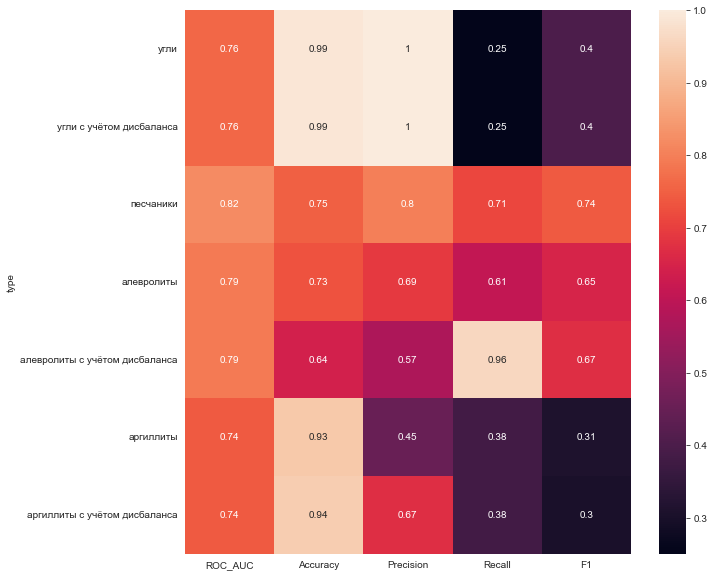

In [181]:
#нарисуем heatmap
plt.figure(figsize = (10,10))
sns.heatmap(total_predict, annot = True)
plt.show()

In [170]:
mean_pred = round(total_predict['ROC_AUC'].mean(), 2)
print('В среднем, точность предсказаний моделей составляет {:.0%}'.format(mean_pred))

В среднем, точность предсказаний моделей составляет 77%


Для прогноза песчаников и алевролитов и аргиллитов лучше себя показала модель градиентного бустинга (последовательного самоулучшения модели).
Угли лучше дифференцировались через логистическую регрессию, но данных было слишком мало (29 образцов), а дисбаланс классов составлял 2:98, поэтому на таких данных обучать модель не считаю корректным.

## Выводы:

**📌 Мне ещё предстоит многому научиться 😊**

**📌 Самым информативным для разделения типов пород является параметр R_U_mean - по нему видно различие в значениях по типам пород**

**📌 Параметры T_mean и PR_mean (по крайней мере, на этом этапе исследования) не годятся для дифференциации типов пород, поскольку имеют множественные пересечение типов на одних значениях**

**📌 Параметр К_meam не информативен для классификации типов пород, а Р_mean помогает определить только угли**

**📌 Лишь песчаники распределены на половине образцов, у других пород наблюдается дисбаланс классов**

**📌 Стандартизация улучшила показатели среднего значения и стандартного отклонения, тем самым нивелировав разброс величин по порядкам** 

**📌 Выбранные для финального обучения параметры (фичи) не зависят друг от друга**

**📌 Результаты кластеризации не коррелируются с реальными данными**

**📌 При обучении с учителем для прогноза песчаников и алевролитов и аргиллитов лучше себя показала модель градиентного бустинга (последовательного самоулучшения модели).**

**📌 Угли лучше дифференцировались через логистическую регрессию, но данных было слишком мало (29 образцов), а дисбаланс классов составлял 2:98, поэтому на таких данных обучать модель не считаю корректным.**

**📌 В среднем, точность предсказаний моделей составляет 77%**



### Рекомендации:

**👍 Необходим комплексный подход к описанию слоя, включающий литологические данные, которые могут влиять на показания приборов**

**👍 Рекомендуется увеличить количество исследуемых данных, чтобы породы были представлены равномерно**

**👍 Попробовать мультиклассификацию для прогноза типа пород**